In [1]:
import numpy as np
import scipy.stats as stats
from scipy.linalg import sqrtm, inv
from scipy.optimize import minimize

import matplotlib.pyplot as plt

import sys
sys.path.insert(1,'../')
from mfvi_main import *
from gaussian_utils import *
from misc_utils import compute_T, gaussian_int


## Step 0: Gaussian parameters

Randomly generate the covariance distribution, and compute the optimal parameter $\alpha^*$. We assume access to $V$ and $\nabla V$

In [2]:
d=5
mean = np.zeros(d)
temp_ = np.random.randn(d,d)
invcov = temp_ @ temp_.T
alpha_opt = 1/np.sqrt(np.max(np.linalg.eigvalsh(invcov)))

V = lambda x: V_Gaussian_highd(x, mean=mean, invcov=invcov)
gradV = lambda x: gradV_Gaussian_highd(x, mean=mean, invcov=invcov)

Note that the *optimal* mean-field approximation in this case is known. Indeed, for $\mathcal{N}(0,\Sigma)$, the mean-field approximation (i.e., closest product measure) is a Gaussian with mean zero and diagonal covariance $\Sigma_{\text{MF}}$ given by

$$ (\Sigma_{\text{MF}})_{ii} = 1/(\Sigma^{-1})_{ii} $$

In [3]:
mf_approx = np.diag(np.diag(1/invcov))

## Step 1: Set up our MF-VI algorithm

Define the mesh-size and truncation parameter of interest; these initialize the dictionary that will be used for all components.

In [4]:
mesh=0.2
trunc=2.9

MFVI_obj = MFVI(V, gradV, mesh, trunc,d)

## Step 2: Run the algorithm 

Many parameters for our algorithm have default values, though the $\alpha$ parameter, as well as the step-size (for both $\lambda$ and $v$) are required, as is the initialization of the weights (the translation parameter $v$ is always initialized at the origin). Since we know the mean is zero, we set the step-size of $v$ to be zero.

We loop through different choices of $\alpha$, and track the Bures-Wasserstein distance between a computed sample covariance matrix and $\Sigma_{\text{MF}}$ at each iteration

In [5]:
h = 1e-4
h_v = 0
iters = 2000
tol = 0.0001
batch_size = 2000

W2_vals_alpha_sweep = []
for alpha in [alpha_opt, alpha_opt/10, alpha_opt/50]:

    MFVI_obj.SPGD(alpha_opt, h, h_v, np.ones((d,MFVI_obj.J)),
              batch_size=batch_size,num_iters=iters,compute_W2=True,
              ground_cov=mf_approx)  
    
    W2_vals_alpha_sweep.append(MFVI_obj.W2_vals)
    

Iter: 50
Iter: 100
Iter: 150
Iter: 200
Iter: 250
Iter: 300
Iter: 350
Iter: 400
Iter: 450
Iter: 500
Iter: 550
Iter: 600
Iter: 650
Iter: 700
Iter: 750
Iter: 800
Iter: 850
Iter: 900
Iter: 950
Iter: 1000
Iter: 1050
Iter: 1100
Iter: 1150
Iter: 1200
Iter: 1250
Iter: 1300
Iter: 1350
Iter: 1400
Iter: 1450
Iter: 1500
Iter: 1550
Iter: 1600
Iter: 1650
Iter: 1700
Iter: 1750
Iter: 1800
Iter: 1850
Iter: 1900
Iter: 1950
Iter: 50
Iter: 100
Iter: 150
Iter: 200
Iter: 250
Iter: 300
Iter: 350
Iter: 400
Iter: 450
Iter: 500
Iter: 550
Iter: 600
Iter: 650
Iter: 700
Iter: 750
Iter: 800
Iter: 850
Iter: 900
Iter: 950
Iter: 1000
Iter: 1050
Iter: 1100
Iter: 1150
Iter: 1200
Iter: 1250
Iter: 1300
Iter: 1350
Iter: 1400
Iter: 1450
Iter: 1500
Iter: 1550
Iter: 1600
Iter: 1650
Iter: 1700
Iter: 1750
Iter: 1800
Iter: 1850
Iter: 1900
Iter: 1950
Iter: 50
Iter: 100
Iter: 150
Iter: 200
Iter: 250
Iter: 300
Iter: 350
Iter: 400
Iter: 450
Iter: 500
Iter: 550
Iter: 600
Iter: 650
Iter: 700
Iter: 750
Iter: 800
Iter: 850
Iter: 900
Ite

## Visualize convergence 


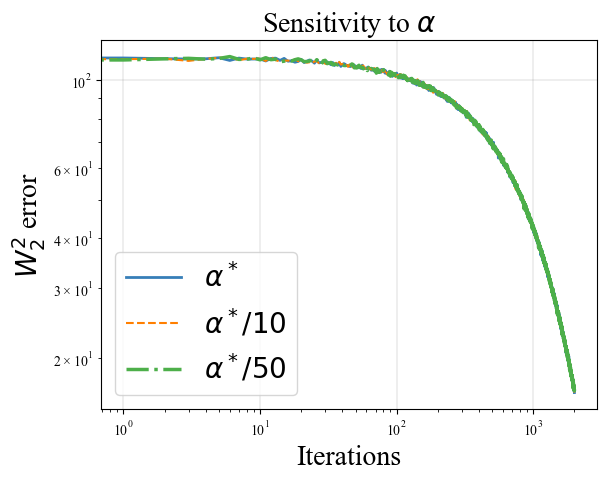

In [6]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.loglog(W2_vals_alpha_sweep[0],label=r'$\alpha^*$',c='#377eb8',linewidth=2.,linestyle='solid')
plt.loglog(W2_vals_alpha_sweep[1],label=r'$\alpha^*/10$',c='#ff7f00',linewidth=1.5,linestyle='dashed')
plt.loglog(W2_vals_alpha_sweep[2],label=r'$\alpha^*/50$',c='#4daf4a',linewidth=2.5,linestyle='dashdot')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.75)
plt.xlabel('Iterations',fontsize='20')
plt.ylabel('$W_2^2$ error', fontsize='20')
plt.title(r'Sensitivity to $\alpha$',fontsize='20')
plt.legend(fontsize='20', loc='lower left')
plt.show()